# Data

This dataset is obtained from Kaggle and it contains English Premier League Players Dataset (2017/18) with FPL data, popularity and market values.
[kaggle_link](https://www.kaggle.com/datasets/mauryashubham/english-premier-league-players-dataset)


## Content

name: Name of the player

club: Club of the player

age : Age of the player

position : The usual position on the pitch

position_cat :

1 for attackers

2 for midfielders

3 for defenders

4 for goalkeepers

market_value : As on transfermrkt.com on July 20th, 2017. In million euros

page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017

fpl_value : Value in Fantasy Premier League as on July 20th, 2017

fpl_sel : % of FPL players who have selected that player in their team

fpl_points : FPL points accumulated over the previous season

region:

1 for England

2 for EU

3 for Americas

4 for Rest of World

nationality

new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)

age_cat

club_id

big_club: Whether one of the Top 6 clubs

new_signing: Whether a new signing for 2017/18 (till 20th July)

# Goal

The aim of this project is to predict the tranfer market value of a player based on attributes like age, playing position, team, fpl value etc.

## Loading the data and other imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('../Transfer Fees Prediction/Data/epldata_final.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [7]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


## Exploratory Data Analysis

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.00,24.0,27.0,30.0,38.0
position_cat,461.0,2.180043,1.000061,1.00,1.0,2.0,3.0,4.0
market_value,461.0,11.012039,12.257403,0.05,3.0,7.0,15.0,75.0
page_views,461.0,763.776573,931.805757,3.00,220.0,460.0,896.0,7664.0
fpl_value,461.0,5.447939,1.346695,4.00,4.5,5.0,5.5,12.5
fpl_points,461.0,57.314534,53.113811,0.00,5.0,51.0,94.0,264.0
region,460.0,1.993478,0.957689,1.00,1.0,2.0,2.0,4.0
new_foreign,461.0,0.034707,0.183236,0.00,0.0,0.0,0.0,1.0
age_cat,461.0,3.206074,1.279795,1.00,2.0,3.0,4.0,6.0
club_id,461.0,10.334056,5.726475,1.00,6.0,10.0,15.0,20.0


In [9]:
df.sort_values(by='page_views',ascending=False).head(10)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
143,Wayne Rooney,Everton,31,SS,1,15.0,7664,7.5,20.90%,76,1.0,England,0,4,7,0,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.50%,115,2.0,France,0,2,12,1,1
376,Dele Alli,Tottenham,21,CM,2,45.0,4626,9.5,38.60%,225,1.0,England,0,1,17,1,0
93,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,3.00%,196,2.0,Spain,0,4,5,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
251,Gabriel Jesus,Manchester+City,20,CF,1,30.0,4254,10.5,15.20%,67,3.0,Brazil,0,1,11,1,1
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,2.30%,224,2.0,Belgium,0,3,5,1,0
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,35.10%,224,1.0,England,0,2,17,1,0
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,9.70%,175,3.0,Argentina,0,4,11,1,0


Most famous players according to page views.

##

In [10]:
sns.set_style("darkgrid")

<Axes: xlabel='market_value', ylabel='Count'>

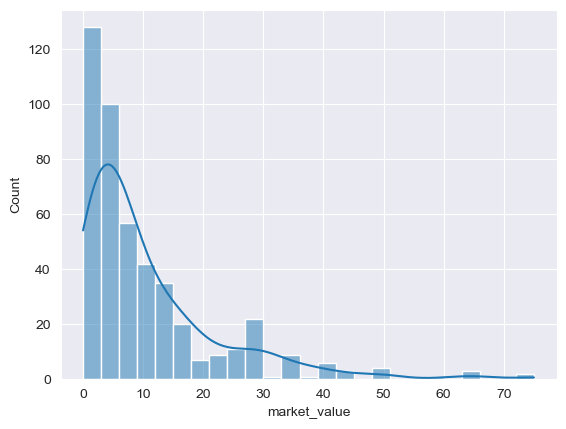

In [11]:
sns.histplot(x='market_value',data=df,kde=True)

Clearly not a normal distribution, but this was expected. Teams tend to have few elite players, and a large number of low + mid value players in their squads.

##

<Axes: xlabel='market_value', ylabel='Count'>

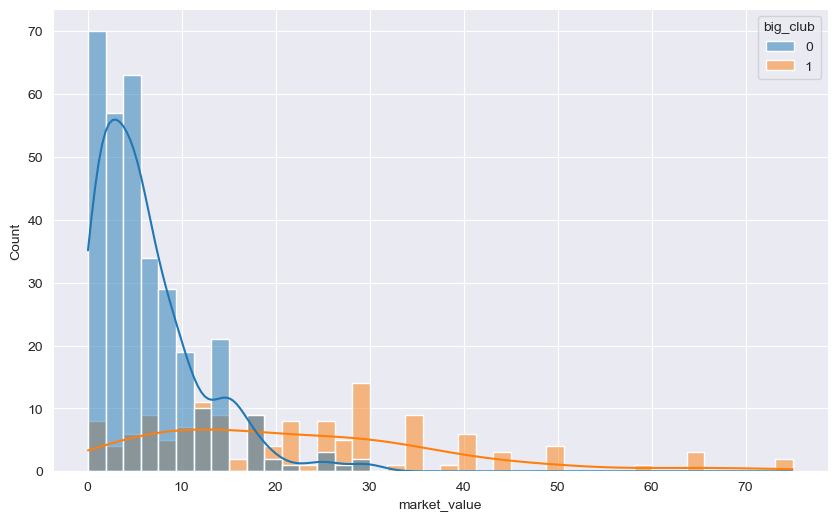

In [12]:
plt.figure(figsize=(10,6),)
sns.histplot(x='market_value',data=df,kde=True,hue='big_club',bins=40)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

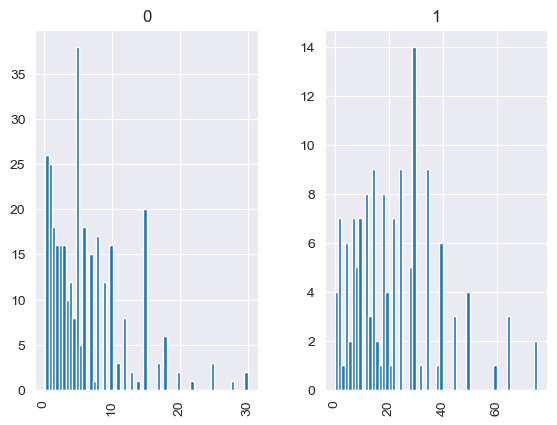

In [13]:
df.hist(column='market_value',by='big_club',bins=60)

The top 6 seem to have a spread of players, whereas the others have a large majority of players worth under 10 million

##

<Axes: xlabel='position', ylabel='market_value'>

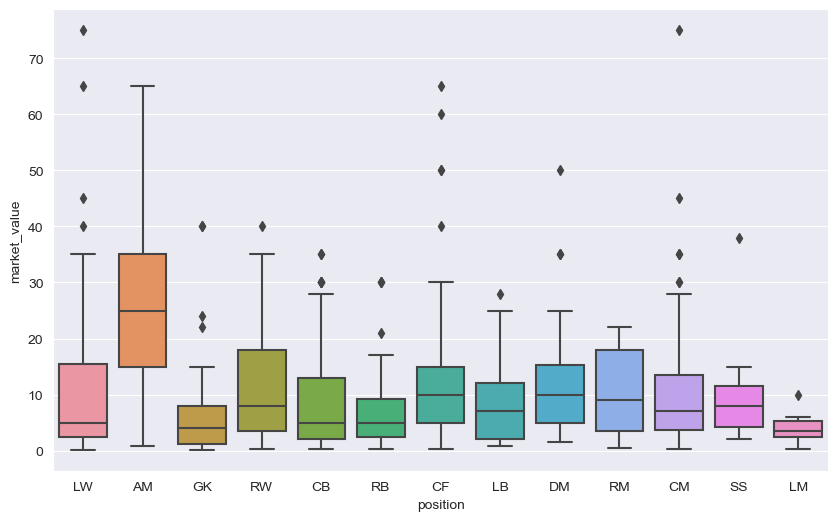

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='position',y='market_value',data=df)

<Axes: xlabel='market_value', ylabel='Density'>

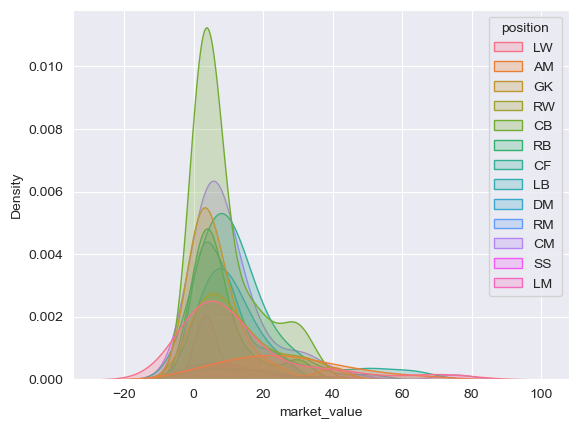

In [15]:
sns.kdeplot(x='market_value',hue='position',data=df,fill=True)

In [16]:
df.groupby('position').mean(numeric_only=True)['market_value'].sort_values(ascending=False)

position
AM    26.161765
CF    13.823770
LW    13.293056
DM    12.347222
RW    12.195312
SS    11.357143
CM    10.960317
RM    10.600000
CB     8.972353
LB     8.300000
RB     7.742647
GK     7.234524
LM     4.000000
Name: market_value, dtype: float64

The top earning positions are AM, CF, and LW.

##

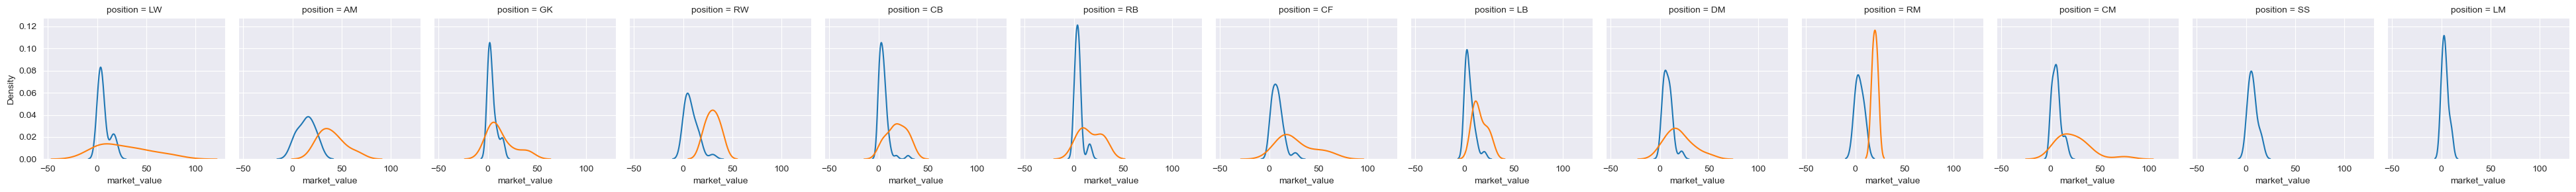

In [17]:
grid = sns.FacetGrid(data=df,col='position', hue='big_club')

grid.map(sns.kdeplot, 'market_value',warn_singular=False)

For almost all the postions, players in smaller clubs are valued much less than the value of the players at bigger clubs

##

In [18]:
df['nationality'].value_counts().head(8)

England        156
Spain           28
France          25
Netherlands     20
Belgium         18
Ireland         17
Argentina       17
Germany         16
Name: nationality, dtype: int64

In [19]:
df.groupby('nationality').mean(numeric_only=True).sort_values(by='market_value',ascending=False).head(10)['market_value']

nationality
Chile            36.500000
Armenia          35.000000
Belgium          25.805556
Kenya            25.000000
Algeria          22.333333
Brazil           21.750000
France           17.980000
Croatia          17.000000
Spain            16.803571
Cote d'Ivoire    15.750000
Name: market_value, dtype: float64

The majority of the players in the data set come from England. But the players valued highest seem to be non-english. We cannot however make any conclusion because this is an English Premiere League data set and players who come to England from other countries probably are very good and play for big clubs (for example almost 70% of Belgian players are in big club), whereas English players are mostly playing for small clubs.

<Axes: xlabel='region', ylabel='market_value'>

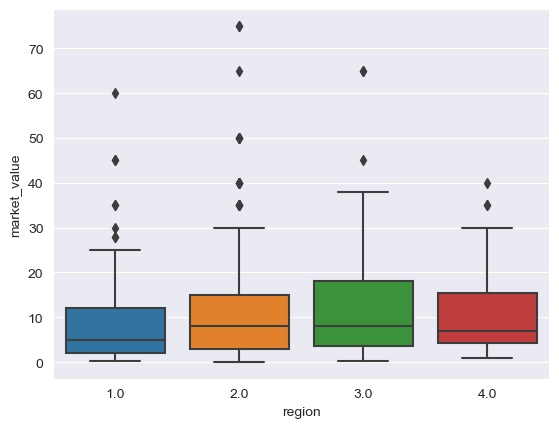

In [20]:
sns.boxplot(x='region',y='market_value',data=df)

##

<Axes: xlabel='age', ylabel='market_value'>

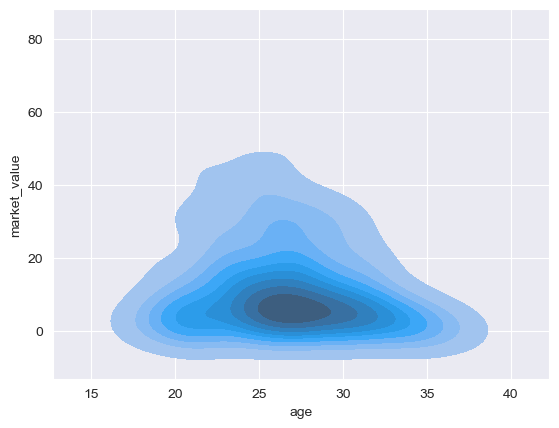

In [21]:
sns.kdeplot(x='age',y='market_value',data=df,fill=True)

Players in the age between 25-30 years have the highest market values. This makes sense as a footballers prime is between 25-30 years.

##

In [22]:
df['position_cat_name']=df['position_cat'].map({1:'attackers',2:'midfielders',3:'defenders',4:'goalkeepers'})

<Axes: xlabel='club', ylabel='market_value'>

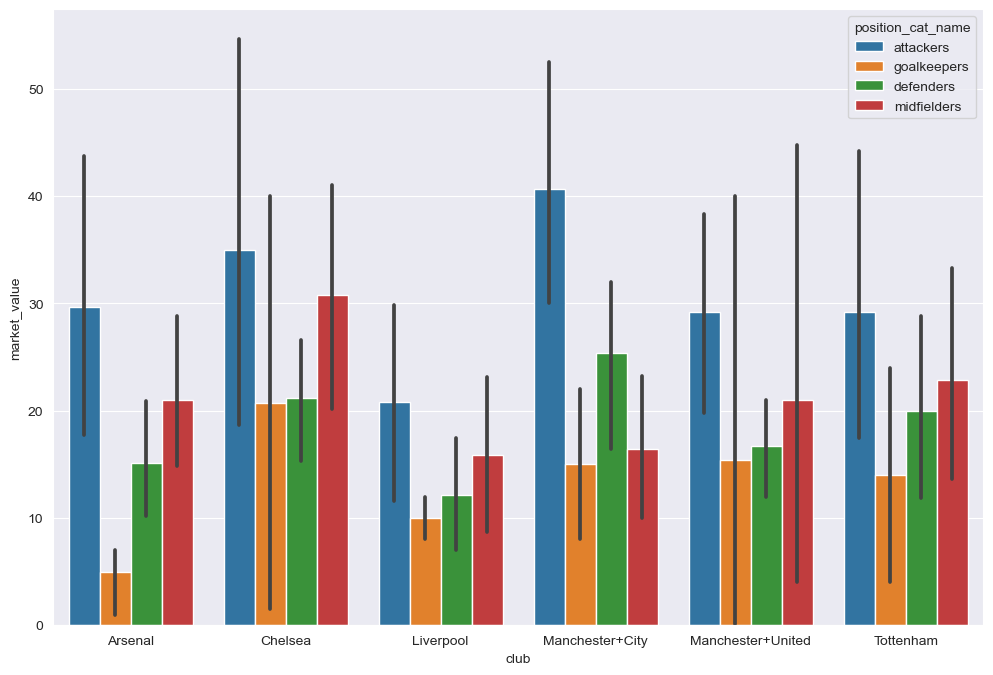

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(data=df[df['big_club']==1],x='club',y='market_value',hue='position_cat_name')

How do each of the top 6 stack up, in terms of positional strength?

##

# Correlations

In [24]:
df.corr(numeric_only=True)['market_value'].sort_values(ascending=False)

market_value    1.000000
fpl_value       0.788653
page_views      0.739657
fpl_points      0.615155
big_club        0.593483
new_signing     0.131321
region          0.101659
new_foreign     0.098056
club_id        -0.046068
age_cat        -0.117682
age            -0.132396
position_cat   -0.217637
Name: market_value, dtype: float64

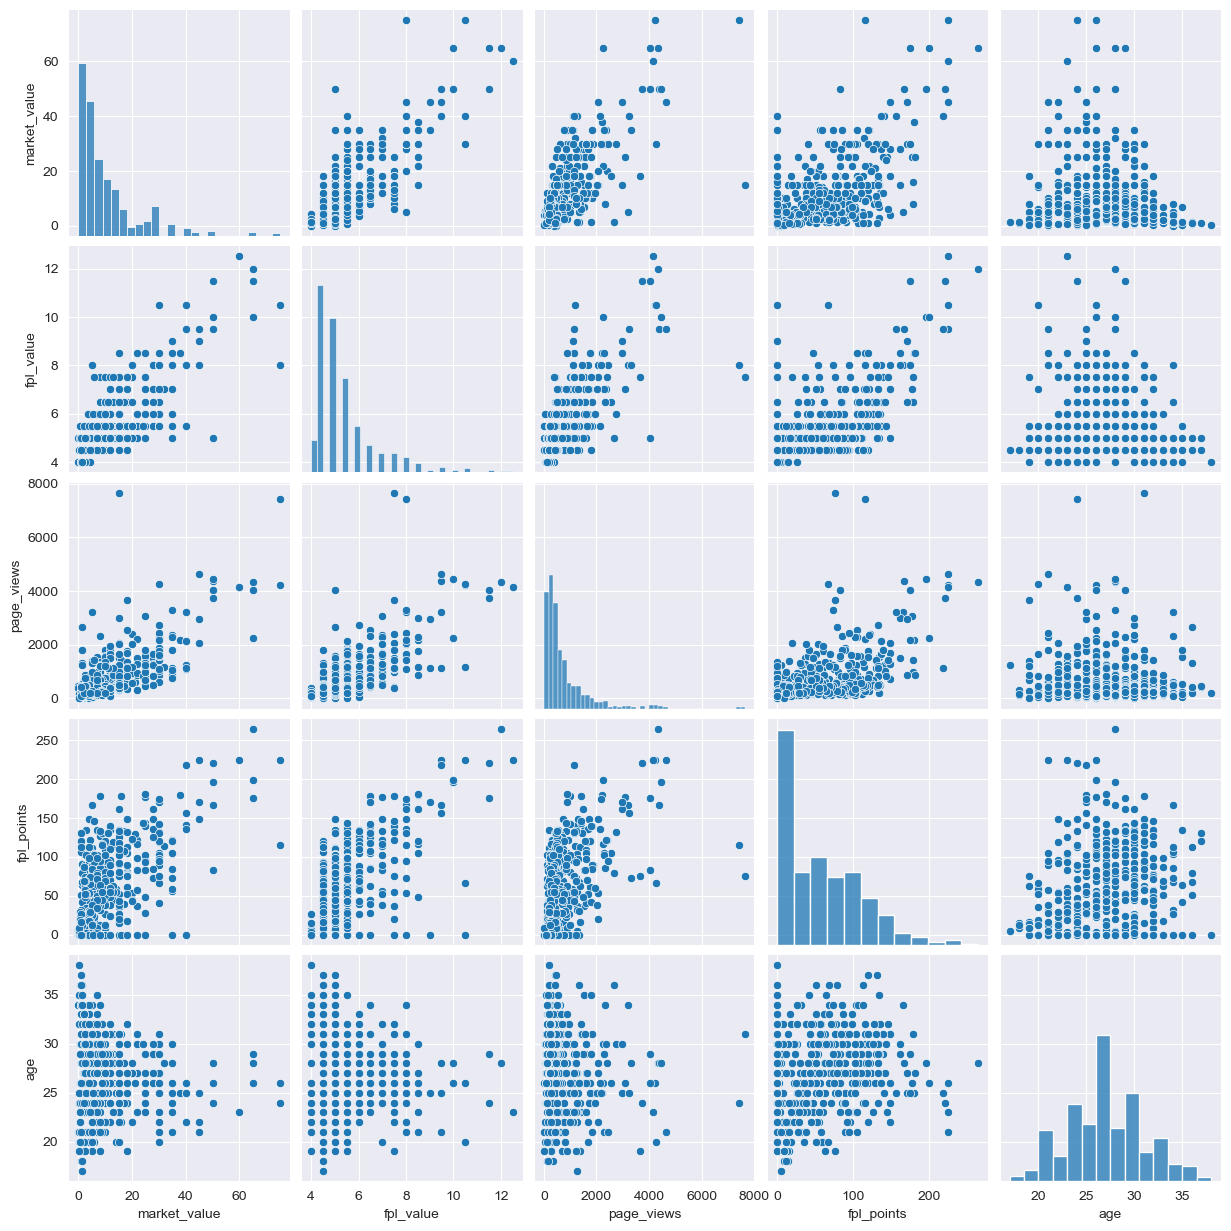

In [25]:
sns.pairplot(df[['market_value','fpl_value','page_views','fpl_points','age']])

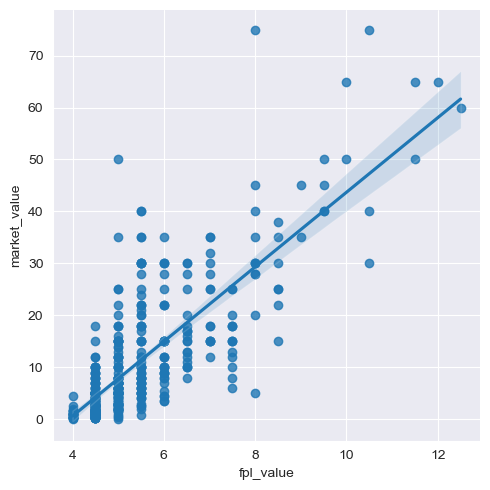

In [26]:
sns.lmplot(x='fpl_value',y='market_value',data=df)

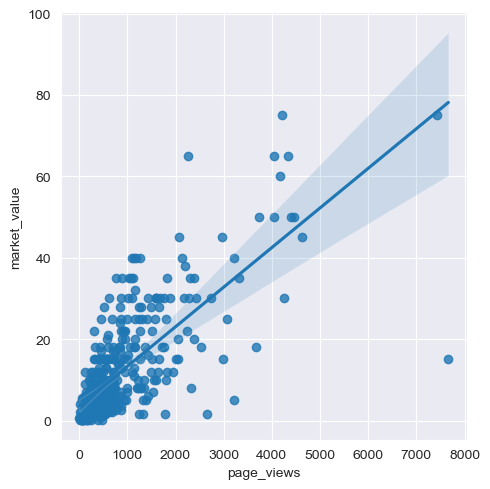

In [27]:
sns.lmplot(x='page_views',y='market_value',data=df)

In [28]:
#converting fpl_sel dtype from str to float so that we can use it for data exploration
df['fpl_sel']=df['fpl_sel'].apply(lambda x:float(x[:-1]))

<Axes: xlabel='fpl_sel', ylabel='market_value'>

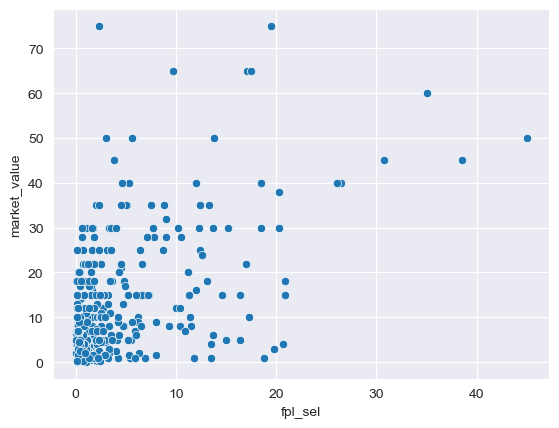

In [29]:
sns.scatterplot(x='fpl_sel',y='market_value',data=df)

Missing Data & Duplicate Data

In [30]:
df.isnull().sum()

name                 0
club                 0
age                  0
position             0
position_cat         0
market_value         0
page_views           0
fpl_value            0
fpl_sel              0
fpl_points           0
region               1
nationality          0
new_foreign          0
age_cat              0
club_id              0
big_club             0
new_signing          0
position_cat_name    0
dtype: int64

In [31]:
df=df.dropna()

In [32]:
df.duplicated().sum()

0

In [33]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,position_cat_name
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0,attackers
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0,attackers
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0,goalkeepers
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1.0,England,0,4,1,1,0,attackers
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2.0,France,0,4,1,1,0,defenders


##

## Train Test Split

In [34]:
df.select_dtypes(include=['number']).columns

Index(['age', 'position_cat', 'market_value', 'page_views', 'fpl_value',
       'fpl_sel', 'fpl_points', 'region', 'new_foreign', 'age_cat', 'club_id',
       'big_club', 'new_signing'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X=df[['age_cat', 'position_cat', 'page_views', 'fpl_value','fpl_sel', 'fpl_points', 'region', 'new_foreign','big_club', 'new_signing']]
y=df['market_value']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
X_train

,age_cat,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,big_club,new_signing
141,3,4,304,4.5,0.4,89,2.0,0,0,0
337,5,2,182,4.5,0.4,62,2.0,0,0,0
404,3,2,703,5.0,0.2,55,1.0,0,0,0
421,3,1,502,6.5,2.0,118,3.0,0,0,0
204,4,2,327,4.5,0.7,41,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
106,2,1,1162,8.5,1.6,48,2.0,0,1,1
271,4,1,3312,8.0,4.5,73,4.0,0,1,1
349,4,2,461,5.0,0.0,15,2.0,0,0,0
436,1,2,15,4.5,0.1,9,1.0,0,0,0


## Scaling the data

In [39]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer

In [40]:
ct = make_column_transformer(( MinMaxScaler(), ['page_views', 'fpl_value', 'fpl_sel', 'fpl_points']),
                                    (OneHotEncoder(),['age_cat','position_cat','big_club','region','new_signing','new_foreign']),
                                    )

In [41]:
X_train_scaled=ct.fit_transform(X_train)
X_test_scaled=ct.transform(X_test)

In [42]:
X_train_scaled

array([[0.03928991, 0.06666667, 0.00888889, ..., 0.        , 1.        ,
        0.        ],
       [0.0233651 , 0.06666667, 0.00888889, ..., 0.        , 1.        ,
        0.        ],
       [0.09137188, 0.13333333, 0.00444444, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.05978332, 0.13333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00156638, 0.06666667, 0.00222222, ..., 0.        , 1.        ,
        0.        ],
       [0.33076622, 0.33333333, 0.00444444, ..., 0.        , 1.        ,
        0.        ]])

In [43]:
X_train_scaled.shape

(308, 24)

In [44]:
X_train.shape

(308, 10)

# Training the Model

## Using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [120]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [47]:
lr.coef_

array([ 9.77834609e+00,  3.44605569e+01,  6.68042701e+00,  9.14290155e+00,
       -9.20552108e-01,  2.41441667e+00,  3.31607036e+00,  8.24754161e-01,
       -1.80706316e+00, -3.82762593e+00, -2.63774106e+00,  1.41390796e+00,
        3.75340283e-01,  8.48492817e-01, -3.33809525e+00,  3.33809525e+00,
       -3.53821063e-01,  1.53232468e-02, -9.92993360e-01,  1.33149118e+00,
       -6.65691426e-02,  6.65691426e-02, -1.66503636e+00,  1.66503636e+00])

In [121]:
# defining a function to plot the predictions against true y

def plot_pred_true(model, X_test):
    pred = model.predict(X_test)
    plt.scatter(pred, y_test)
    plt.xlabel('predictions')
    plt.ylabel('true y')
    plt.title(f"{model}")

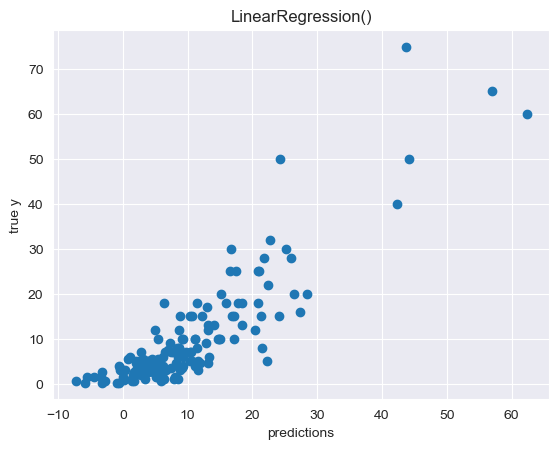

In [122]:
plot_pred_true(lr, X_test_scaled)

In [123]:
from sklearn import metrics

# defining function to print model performance metrics

def model_metrics(model, X_test):
    
    predictions = model.predict(X_test)  
    
    print(f"{model}")
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R^2 score', metrics.r2_score(y_test, predictions))

In [124]:
model_metrics(lr, X_test_scaled)

LinearRegression()
MAE: 3.989631771816413
MSE: 33.4982128101413
RMSE: 5.787764059646981
R^2 score 0.7696095401911792


Text(0.5, 0, 'absolute error')

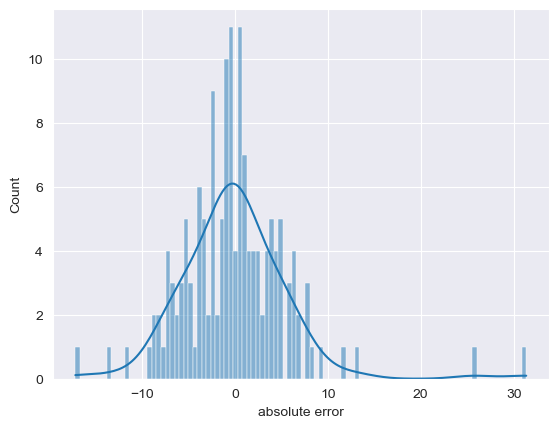

In [74]:
sns.histplot((y_test-predictions),kde=True,bins=100)
plt.xlabel("absolute error")

#### Trying to interpret predictions 

In [52]:
import random

random_ind = random.randint(0,len(X_test_scaled))

new_player = X_test_scaled[random_ind]
new_player

array([0.03119697, 0.13333333, 0.00666667, 0.22222222, 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        ])

In [53]:
new_player.shape

(24,)

In [54]:
new_player=new_player.reshape(-1, 24)

In [55]:
lr.predict(new_player)

array([8.37661774])

In [56]:
y_test.iloc[random_ind]

7.0

Text(0, 0.5, 'residuals')

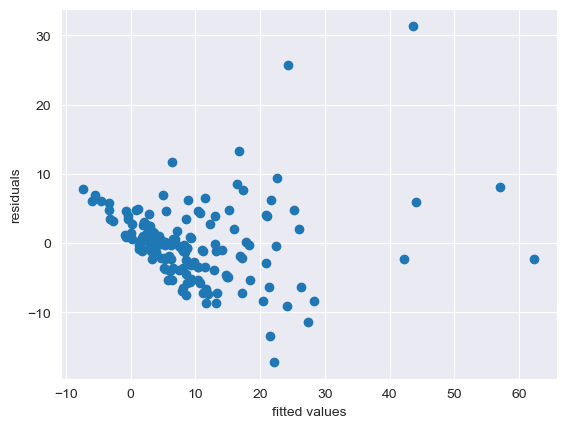

In [75]:
import tensorflow as tf


plt.scatter(predictions,y_test-tf.squeeze(predictions),)

plt.xlabel('fitted values')
plt.ylabel('residuals')

On plotting the residuals we can see a pattern, this suggests that the non-linear relationship between the response and the variables. We can use transformations on X and y to improve our model results. But for the sake of interpretability we do not do that here.

## Trying to improve the Linear model using:
1. Ridge Regression
2. Lasso Refression
3. PCA

## 1. Ridge Regression

In [58]:
from sklearn.linear_model import Ridge

In [87]:
lr_ridge = Ridge(alpha=1)
lr_ridge.fit(X_train_scaled,y_train)

Ridge(alpha=1)

In [88]:
lr_ridge.coef_

array([ 1.03394331e+01,  2.59559755e+01,  7.52770114e+00,  1.12510213e+01,
       -1.05000071e+00,  2.35956983e+00,  3.39655759e+00,  8.82612740e-01,
       -1.68708978e+00, -3.90164968e+00, -1.32717575e+00,  1.21325786e+00,
        2.04550658e-02,  9.34628294e-02, -3.77972612e+00,  3.77972612e+00,
       -4.43383934e-01, -2.46750566e-02, -7.78003253e-01,  1.24606224e+00,
       -1.17462705e-01,  1.17462705e-01, -2.26654379e+00,  2.26654379e+00])

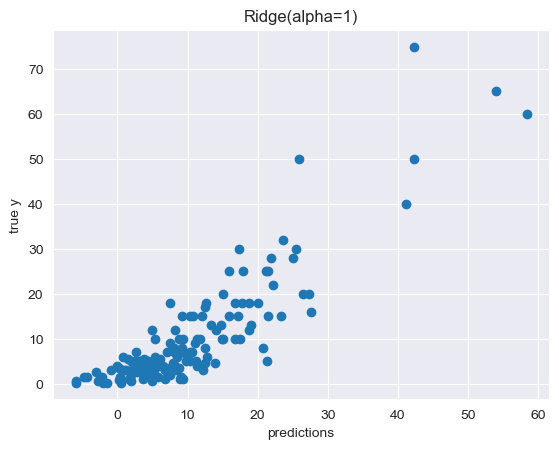

In [125]:
plot_pred_true(lr_ridge, X_test_scaled)

In [126]:
model_metrics(lr_ridge, X_test_scaled)

Ridge(alpha=1)
MAE: 3.9879323949204055
MSE: 33.25176351170527
RMSE: 5.766434211165967
R^2 score 0.7713045430711253


There is a slight improvement in the metrics 

### Let's find the optimum value of lambda

In [69]:
MSE = []

for i in range(0,3):
    
    lr_ridge = Ridge(alpha=i)
    lr_ridge = lr_ridge.fit(X_train_scaled, y_train)
    pred = lr_ridge.predict(X_test_scaled)
    MSE.append(metrics.mean_squared_error(y_test, pred))

Text(0.5, 1.0, 'Ridge Regression for different lambdas')

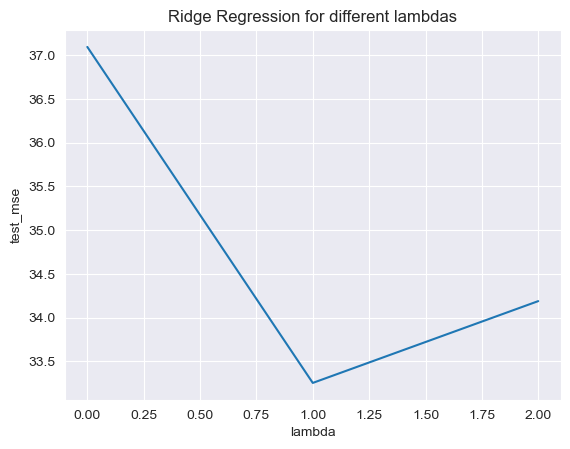

In [72]:
plt.plot(range(0,3),MSE)
plt.xlabel("lambda")
plt.ylabel("test_mse")
plt.title("Ridge Regression for different lambdas")

Best value of lambda is 1

## 2.  Lasso Regression

In [78]:
from sklearn.linear_model import Lasso

In [158]:
lr_lasso = Lasso(alpha = 1)

lr_lasso.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [159]:
lr_lasso.coef_

array([ 0.00000000e+00,  9.50008074e+00,  0.00000000e+00,  4.77447444e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -9.29969956e+00,  1.71082943e-15,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00])

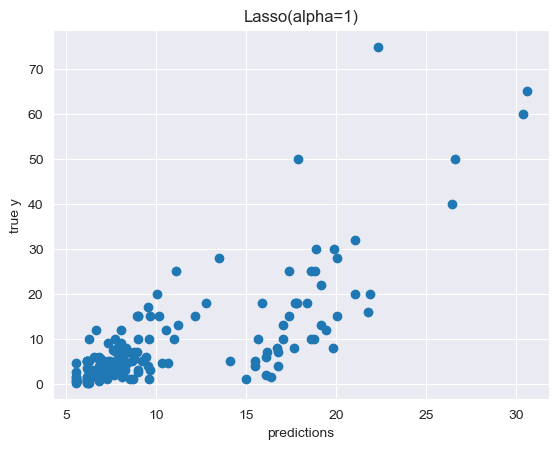

In [160]:
plot_pred_true(lr_lasso, X_test_scaled)

In [161]:
model_metrics(lr_lasso, X_test_scaled)

Lasso(alpha=1)
MAE: 5.875436310303217
MSE: 76.75261959526209
RMSE: 8.760857240890418
R^2 score 0.472118962874027


Lasso performs worse

## 3. PCR (Principle Component Regression)

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components = 2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [112]:
X_train_pca.shape

(308, 2)

In [131]:
pca.explained_variance_ratio_

array([0.16916047, 0.12719991])

In [115]:
X_test_pca.shape

(152, 2)

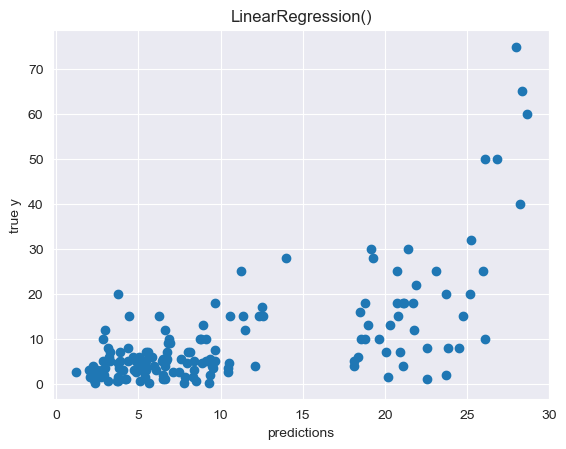

In [130]:
lr_pca=LinearRegression()

lr_pca.fit(X_train_pca, y_train)

plot_pred_true(lr_pca, X_test_pca)

In [133]:
model_metrics(lr_pca, X_test_pca)

LinearRegression()
MAE: 5.884758371084215
MSE: 82.73878692327713
RMSE: 9.096086352012998
R^2 score 0.430947935302777


### Finding the optimal number of components

In [137]:
MSE_pca=[]

for i in range(1,25):
    pca_i = PCA(n_components = i)
    X_train_pca_i = pca_i.fit_transform(X_train_scaled)
    X_test_pca_i = pca_i.transform(X_test_scaled)
    
    lr_pca_i=LinearRegression()
    lr_pca_i.fit(X_train_pca_i, y_train)
    pred_pca = lr_pca_i.predict(X_test_pca_i)
    MSE_pca.append(metrics.mean_squared_error(y_test, pred_pca))

Text(0.5, 1.0, 'PCA for different n_components')

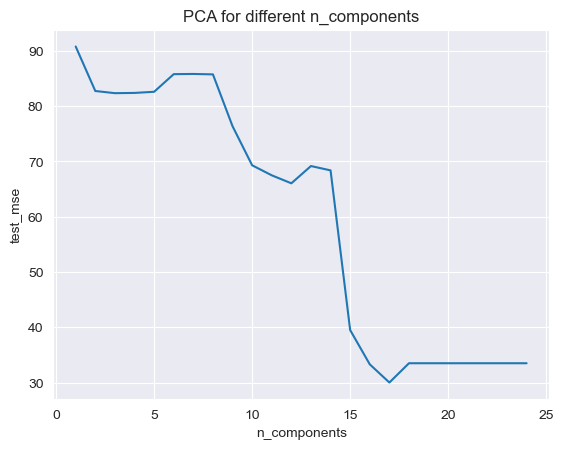

In [138]:
plt.plot(range(1,25),MSE_pca)
plt.xlabel("n_components")
plt.ylabel("test_mse")
plt.title("PCA for different n_components")

The optimal number of components seems to be around **17** from the above plot

In [146]:
n_components_df = pd.DataFrame(MSE_pca, columns=['MSE'])
n_components_df['n_components'] = range(1,25)
n_components_df.sort_values(by='MSE')

,MSE,n_components
16,30.011967,17
15,33.301367,16
23,33.498213,24
22,33.498213,23
20,33.498213,21
19,33.498213,20
18,33.498213,19
21,33.498213,22
17,33.498213,18
14,39.498693,15


In [147]:
pca = PCA(n_components = 17)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [149]:
pca.explained_variance_ratio_

array([0.16916047, 0.12719991, 0.11410107, 0.10524702, 0.09110033,
       0.08076533, 0.07079098, 0.05023353, 0.04266681, 0.03601014,
       0.02648765, 0.02512633, 0.02056976, 0.01718091, 0.01610174,
       0.00367647, 0.00235717])

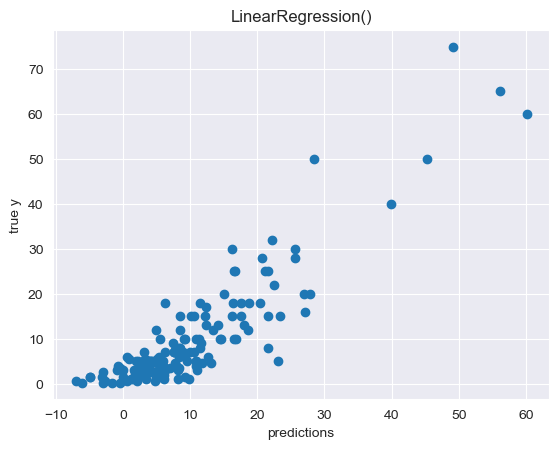

In [151]:
lr_pca=LinearRegression()

lr_pca.fit(X_train_pca, y_train)

plot_pred_true(lr_pca, X_test_pca)

In [153]:
model_metrics(lr_pca, X_test_pca)

LinearRegression()
MAE: 3.861536855029617
MSE: 30.01196715766877
RMSE: 5.478317913161737
R^2 score 0.793586871263495


Out of all the linear model regularisation techniques used **PCA performs best**



## Using ANN

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [56]:
# Number of input features 
len(X.columns)

10

In [57]:
model= Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(),metrics='mae')

In [58]:
history = model.fit(X_train_scaled, y_train, epochs=400, validation_data=(X_test_scaled, y_test), batch_size=128,callbacks=[early_stop])

Epoch 1/400
3/3 [==============================] - 1s 82ms/step - loss: 280.7030 - mae: 11.3236 - val_loss: 234.3100 - val_mae: 9.3921
Epoch 2/400
3/3 [==============================] - 0s 18ms/step - loss: 272.8892 - mae: 11.0000 - val_loss: 227.5530 - val_mae: 9.0653
Epoch 3/400
3/3 [==============================] - 0s 17ms/step - loss: 264.9313 - mae: 10.6905 - val_loss: 220.6045 - val_mae: 8.7411
Epoch 4/400
3/3 [==============================] - 0s 16ms/step - loss: 256.5952 - mae: 10.4026 - val_loss: 213.2757 - val_mae: 8.4104
Epoch 5/400
3/3 [==============================] - 0s 18ms/step - loss: 248.1740 - mae: 10.1111 - val_loss: 205.4144 - val_mae: 8.0828
Epoch 6/400
3/3 [==============================] - 0s 19ms/step - loss: 238.5182 - mae: 9.8100 - val_loss: 197.0869 - val_mae: 7.7806
Epoch 7/400
3/3 [==============================] - 0s 19ms/step - loss: 228.2473 - mae: 9.5054 - val_loss: 188.3370 - val_mae: 7.4920
Epoch 8/400
3/3 [==============================] - 0s 19m

3/3 [==============================] - 0s 16ms/step - loss: 21.7622 - mae: 3.2206 - val_loss: 25.5550 - val_mae: 3.3306
Epoch 124/400
3/3 [==============================] - 0s 15ms/step - loss: 21.5822 - mae: 3.2044 - val_loss: 25.4455 - val_mae: 3.3377
Epoch 125/400
3/3 [==============================] - 0s 16ms/step - loss: 21.4350 - mae: 3.2059 - val_loss: 25.2593 - val_mae: 3.3411
Epoch 126/400
3/3 [==============================] - 0s 16ms/step - loss: 21.3421 - mae: 3.2173 - val_loss: 25.1419 - val_mae: 3.3561
Epoch 127/400
3/3 [==============================] - 0s 16ms/step - loss: 21.2651 - mae: 3.2217 - val_loss: 25.1114 - val_mae: 3.3595
Epoch 128/400
3/3 [==============================] - 0s 14ms/step - loss: 21.1902 - mae: 3.2128 - val_loss: 25.1028 - val_mae: 3.3553
Epoch 129/400
3/3 [==============================] - 0s 16ms/step - loss: 21.0818 - mae: 3.1832 - val_loss: 25.1854 - val_mae: 3.3481
Epoch 130/400
3/3 [==============================] - 0s 16ms/step - loss: 20

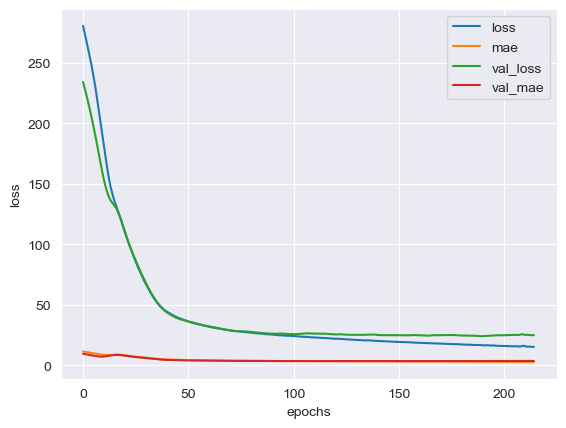

In [59]:
losses = pd.DataFrame(history.history)
losses.plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


In [60]:
predictions1=model.predict(X_test_scaled)

5/5 [==============================] - 0s 1ms/step


In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
print('R^2 score', metrics.r2_score(y_test, predictions1))

MAE: 3.4119804508273344
MSE: 24.760712882489106
RMSE: 4.976013754250395
R^2 score 0.8297033916847101


Text(0, 0.5, 'true y')

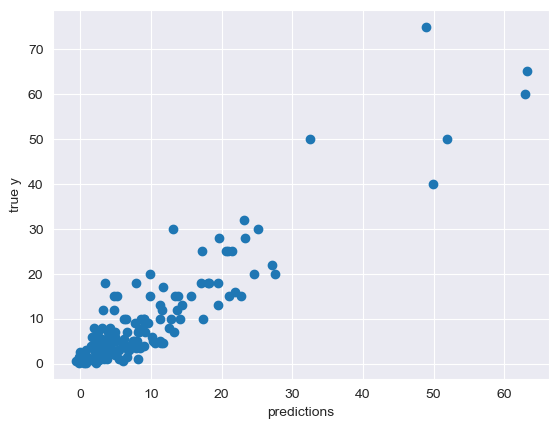

In [62]:
plt.scatter(predictions1,y_test)

plt.xlabel('predictions')
plt.ylabel('true y')

In [63]:
import random

random_ind = random.randint(0,len(X_test_scaled))

new_player = X_test_scaled[random_ind]
new_player

array([0.26223731, 0.4       , 0.11555556, 0.16888889, 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        ])

In [64]:
new_player=new_player.reshape(-1, 24)

In [65]:
model.predict(new_player)[0][0],y_test.iloc[random_ind]

1/1 [==============================] - 0s 16ms/step


(13.8147335, 15.0)

In [66]:
y_test.shape

(152,)

Text(0, 0.5, 'residuals')

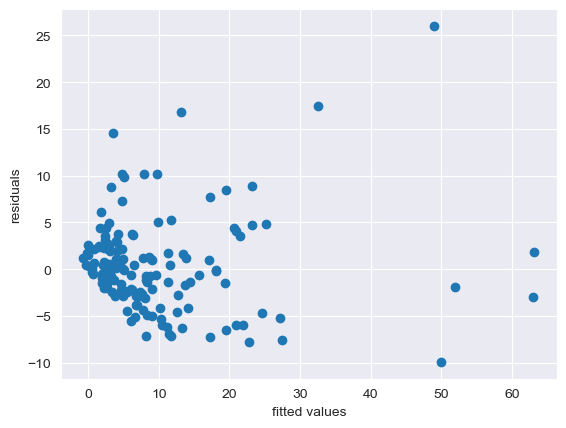

In [67]:
plt.scatter(predictions1,y_test-tf.squeeze(predictions1),)

plt.xlabel('fitted values')
plt.ylabel('residuals')